# Цифровая обработка сигналов - Лекция 15
# Тема: Алгоритм Герцеля

## Введение

Перед вами обучающий материал по основам **цифровой обработки сигналов** с использованием средств языка программирования Python. Предполагается, что читатель имеет базовые знания из области высшей математики, а также владеет языком Python и хотя бы поверхностно знает различные python-библиотеки - numpy/scipy, matplotlib и другие. 

Для пользователей MATLAB / GNU Octave освоение материала с точки зрения программного кода не составит труда, поскольку основные функции и их атрибуты во многом идентичны и схожи с методами из python-библиотек.

## Теоретический базис

В предыдущих разделах нами были рассмотрены дискретное преобразование Фурье(ДПФ) и метод быстрого преобразования Фурье(БПФ). Была продемонстрирована возможность более эффективного расчета результата дискретного преобразования Фурье при использовании алгоритма БПФ. На практике же, например при декодировании сигналов Dual-Tone Multi-Frequency (DTMF), может потребоваться рассчитать ДПФ только для ограниченного количества отсчетов. В данном примере, чтобы получить значение одного спектрального отсчета, будет необходимо осуществить расчет полного дискретного преобразования Фурье. В этом случае использование алгоритма быстрого преобразования Фурье может потребовать большого количества вычислительных ресурсов.

Ниже будет рассмотрен алгоритм Герцеля, позволяющий осуществить расчет для ограниченного количества отсчетов ДПФ.

### Быстрое преобразование Фурье как БИХ фильтр
Пусть имеется входной сигнал $s(n), n = 0, 1, ... N - 1$. Тогда набор из $N$ отсчетов данного сигнала можно записать в виде набора из $N$ частотных коэффициентов с использованием дискретного преобразования Фурье (ДПФ) в следующем виде:
$$S(k) = \sum_{n=0}^{N-1}s(n)W_{N}^{nk} \tag{15.1}$$,

где $k = 0 ... N - 1$, $W_{N}^{nk} = exp(-j\frac{2\pi}{N}nk)$, $W_{N}^{nk}$ - поворотные коэффициенты. 

Так же заметим, что поворотные коэффициенты обладают следующим свойством:

$$W_{N}^{-kN} = exp(-j\frac{2\pi}{N}Nn);  k = 0 ... N - 1 \tag{15.2}$$.

Это означает, что выражение (15.1) может быть записано в виде:

$$S(k) = W_{N}^{-kN}\sum_{n=0}^{N-1}s(n)W_{N}^{nk} = \sum_{n=0}^{N-1}s(n)W_{N}^{k(n - N)} \tag{15.3}$$.

Раскрывая сумму (15.3) получим следующее выражение:

$$S(k)=s(0)W_{N}^{-kN}+s(1)W_{N}^{-k(N-1)}+s(2)W_{N}^{-k(N-2)}+...+s(1)W_{N}^{-k} \tag{15.4}$$.

Обозначим $S(k)=y_{N-1}(k)$ и вынесем в $W_{N}^{-k}$ для фиксированного номера $k$ отсчета в ДПФ. Тогда перепишем выражение (15.4) следующим образом:

$$y_{N-1}(k)=W_N^{-k}(s(N-1) + y_{N-2}(k)) \tag{15.5}$$.

Таким образом получим рекуррентное соотношение для вычисления y_{r}(k) для любого шага $r$ через y_{r-1}(k)

$$y_{r}(k)=W_N^{-k}(s(r) + y_{r-1}(k)) \tag{15.6},$$ где $s(r)$ - отсчет исходного сигнала с номером $r$

Соотношение $(15.7)$ представляет собой выражение фильтра с бесконечной импульсной характеристикой(БИХ) первого порядка с коэффициентом $W_{N}^{-k}$. Структурная схема БИХ-фильтра представлена на рисунке:

<img src="https://raw.githubusercontent.com/anotherhelloworld/dsp-theory/makhliarchuk/goertzel/img/goertzel_iir.svg" alt="Goertzel IIR Filter" style="width: 50%;"/>

*Рис. 1. Схема БИХ-фильтра, реализующего расчет спектрального отсчета с номером $k$*

Для удобства дальнейших рассуждений обозначим $z$-образы $x(r)$ и $y_r(k)$ через $X(z)$ и $Y(z)$ соответственно. В таком случае $z^{-1}Y(z)$ это $z$-образ $y_{r-1}(k)$. Уравнение 15.6 в операторном виде будет иметь вид:

$$Y(z)=W_{N}^{-k}(X(z) + z^{-1}Y(z)) \tag{15.7}$$.

Таким образом, преобразовав выражение дискретного преобразования Фурье для одного фиксированного отсчета, мы получили соотношение, которое позволяет на $N-1$ шаге получить искомое значение $k$-го спектрального отсчета $S(k)$. Данное рекуррентное соотношение мы можем трактовать как разностное уравнение БИЧ-фильтра с передаточной характеристикой, имеющей вид:

$$H(z) = \frac{Y(z)}{X(z)}=\frac{W_{N}^{-k}}{1-W^{-k}_{N}z^{-1}} \tag{15.8}$$.

В результате был получен фильтр первого порядка с комплексным коэффициентом $W_{N}^{-k}$, используя который на $N - 1$-ой итерации на выходе дает $S(k)$. При этом для фиксированного номера отсчета $k$ значение коэффициента $W_{N}^{-k} всегда постоянно.$

### Алгоритм Гёрцеля
Исходя из выражения (15.1), следует, что при использовании БИХ-фильтра для получения одного спектрального отсчета $S(k)$ требуется $N$ умножений и сложений. Это не делает вычисление $k$-го отсчета эффективнее в сравнении с прямым вычислением Дискретного Преобразования Фурье.

Для достижения экономии вычислительных ресурсов необходимо умножить числитель и знаменатель передаточной характеристики БИХ-фильтра 15.8 на $1-W^{-k}_{N}z^{-1}$:

$$H(z) = \frac{W_{N}^{-k}}{1-W^{-k}_{N}z^{-1}} = \frac{W_{N}^{-k}(1-W^{-k}_{N}z^{-1})}{1-W^{-k}_{N}z^{-1}(1-W^{-k}_{N}z^{-1})} = \frac{W^{-k}_{N} - z^{-1}}{1 - z^{-1}(W^{-k}_{N} + W^{k}_{N}) + z^{-2}} \tag{15.9}$$.

Сумму $W^{-k}_{N} + W^{k}_{N}$ можно переписать следующим образом:

$$W^{-k}_{N} + W^{k}_{N} = exp(j\frac{2\pi}{N}k) + exp(-j\frac{2\pi}{N}k) = 2cos(\frac{2\pi}{N}k) \tag{15.10}$$.

Таким образом передаточная характеристика $H(z)$ может быть представлена в следующем виде:

$$H(z)=\frac{W^{-k}_{N} - z^{-1}}{1 - 2cos(\frac{2\pi}{N}k)z^{-1} + z^{-2}} \tag{15.11}$$.

Передаточная характеристика 15.11 соответствует БИХ-фильтру второго порядка, где $\alpha=2cos(\frac{2\pi}{N}k).$

<img src="https://raw.githubusercontent.com/anotherhelloworld/dsp-theory/makhliarchuk/goertzel/img/goertzel_iir_k.svg" alt="Goertzel IIR Filter" style="width: 50%;"/>

*Рис. 2. Структурная схема БИХ-фильтра реализующего расчет спектрального отсчета с номером k*

Коэффициент $\alpha$ является вещественным. Так как при расчете $S(k)$ не требуются промежуточные значения $y_r(k)$, значит умножение на $W_N^{-k}$ можно произвести только на $N -1 $ шаге. Это существенно сокращает сложность вычислительных операций, так как применение фильтра второго порядка позволяет использовать вещественные умножения вместо комплексных. Комплексное же умножение потребуется только на последнем шаге работы алгоритма.

Это означает, что спектральный отсчет с номером $k$ равен:

$$S(k)=y_{N-1}(k)=W_N^{-k}v(N-1) - v(N-2) \tag{15.12}$$,

$v(r)$ - промежуточные значения:

$$v(r) = s(r) + 2cos(\frac{2\pi}{N})v(r-1) - v(r-2) \tag{15.13}$$

### Пример использования алгоритма Герцеля

Пускай $N = 8$, исходный сигнал $s(n)$:

<img src="https://raw.githubusercontent.com/anotherhelloworld/dsp-theory/makhliarchuk/goertzel/img/goertzel_signal.svg" alt="Goertzel signal" style="width: 90%;"/>

*Рис. 3. Исходный сигнал*

Для работы с алгоритмом Герцеля необходимо заранее рассчитать коэффициенты $\alpha$ и $W^{-k}_N$:

$$\alpha=2cos(2\pi\frac{1}{8})=1.4142$$

$$W^{-k}_{N}=W_{8}^{-1}=exp(j\frac{2\pi}{8})=0.7071 + 0.7071j \tag{15.14}$$

Зададим следующие начальные условия: $v(-2)=v(-1)=0$

После чего, используя соотношение 15.13, последовательно рассчитаем $v(r), r = 0, ... N-1$

$$v(0) = s(0) + \alpha v(-1) - v(-2) = 6.0000$$

$$v(1) = s(1) + \alpha v(0) - v(-1) = 12.4852$$

$$v(2) = s(2) + \alpha v(1) - v(0) = 13.6564$$

$$v(3) = s(3) + \alpha v(2) - v(1) = 4.8277$$

$$v(4) = s(4) + \alpha v(3) - v(2) = -4.8291$$

$$v(5) = s(5) + \alpha v(4) - v(3) = -15.6570$$

$$v(6) = s(6) + \alpha v(5) - v(4) = -23.3130$$

$$v(7) = s(7) + \alpha v(6) - v(5) = -21.3122 \tag{15.15}$$

Затем рассчитаем спектральный отсчет $S(1)$ с номером $k=1$:

$$S(1) = W_{8}^{-1}v(7) - v(6) = 8.24314 - 15.06985662 \tag{15.16}j$$

## Пример программной реализации алгоритма Герцеля

В данном разделе попробуем декодировать сигнал типа DTMF(Dual-Tone Multi-Frequency). Данный тип сигнала является двухтональным сигналом и используется в том числе для набора номера на цифровых АТС.

Для кодирования символов(цифры 1-9, A,B,C,D,*,#) требуется два тона, представленные в таблице:

|     Группы частот Гц       |   1209  |  1336   |  1477   |  1633   |
|:--------------------------:|---------|---------|---------|---------|
|          **697**           | 1       | 2       | 3       | A       |
|          **770**           | 4       | 5       | 6       | B       |
|          **852**           | 7       | 8       | 9       | C       |
|          **941**           | *       | 0       | #       | D       |

Это означает, что для декодирования сигнала такого типа необходимо рассчитать 8 спектральных отсчетов дискретного преобразования Фурье с индексами, которые соответствуют частотам 8-ми тональных сигналов.

Номера отсчетов $k$ для частоты дискретизации $F_s=8$ кГц, для 205-точечного ДПФ, представлены в таблице:

| $f$ кГц | 697 | 770 | 852 | 941 | 1209 | 1336 | 1477 | 1633 |
|:-------:|-----|-----|-----|-----|------|------|------|------|
| $k$     | 18  | 20  | 22  | 24  | 31   | 34   | 38   | 42   |
|         |     |     |     |     |      |      |      |      |

Код и пример работы алгоритма представлены ниже:

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pylab

import math

FONT_SMALL = 10
FONT_MEDIUM = 12

plt.rc('axes', titlesize=FONT_SMALL) 
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL) 
plt.rc('legend', fontsize=FONT_SMALL) 
plt.rc('figure', titlesize=FONT_SMALL)

%matplotlib inline


In [2]:
def goertzel(samples, sample_rate, *freqs):
    window_size = len(samples)
    f_step = sample_rate / float(window_size)
    f_step_normalized = 1.0 / window_size

    n_range = range(0, window_size)
    freqs = []
    results = []

    bins = (18, 20, 22, 24, 31, 34, 38, 42)
    for k in bins:

        f = k * f_step_normalized
        w_real = 2.0 * math.cos(2.0 * math.pi * f)
        w_imag = math.sin(2.0 * math.pi * f)

        d1, d2 = 0.0, 0.0
        for n in n_range:
            y  = samples[n] + w_real * d1 - d2
            d2, d1 = d1, y

        results.append((
            0.5 * w_real * d1 - d2, w_imag * d1,
            d2**2 + d1**2 - w_real * d1 * d2)
        )
        freqs.append(f * sample_rate)
    return freqs, results

In [3]:
SAMPLE_RATE = 8000
WINDOW_SIZE = 205

In [4]:
def create_wave(freqs):
    t = np.linspace(0, 1, SAMPLE_RATE)[:WINDOW_SIZE]
    sine_wave = np.sin(2*np.pi*freqs[0]*t) + np.sin(2*np.pi*freqs[1]*t)
    return sine_wave

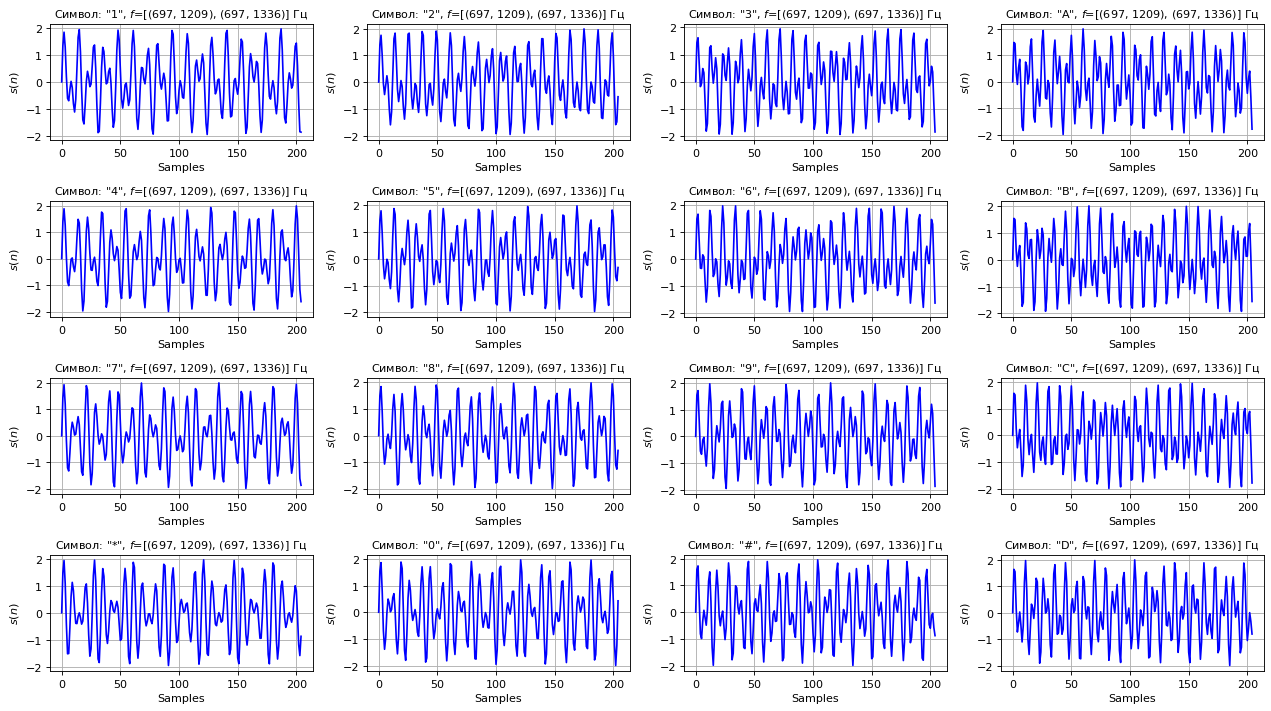

In [5]:
plt.figure(figsize=(16, 9), dpi=80)

sample_rates = [(697, 1209), (697, 1336), (697, 1477), (697, 1633), 
                (770, 1209), (770, 1336), (770, 1477), (770, 1633),
                (852, 1209), (852, 1336), (852, 1477), (852, 1633),
                (941, 1209), (941, 1336), (941, 1477), (941, 1633)]

freqs_list = []
results_list = []
symbols = [ "1", "2", "3", "A", "4", "5", "6", "B", "7", "8", "9", "C", "*", "0", "#", "D"]

for i in range(16):
    plt.subplot(4, 4, (i+1))
    sine_wave = create_wave(sample_rates[i])
    freqs, results = goertzel(sine_wave, SAMPLE_RATE, (0, WINDOW_SIZE))
    freqs_list.append(freqs)
    results_list.append(results)
    
    plt.plot(sine_wave, 'b-', linewidth=1.5)
    plt.grid()
    plt.ylabel('$s(n)$')
    plt.xlabel('Samples')
    plt.title(f'Символ: "{symbols[i]}", $f$=[{sample_rates[0]}, {sample_rates[1]}] Гц')
plt.tight_layout()

Амплитуды спектральных отсчетов DTMF, рассчитанные при помощи алгоритма Гёрцеля:

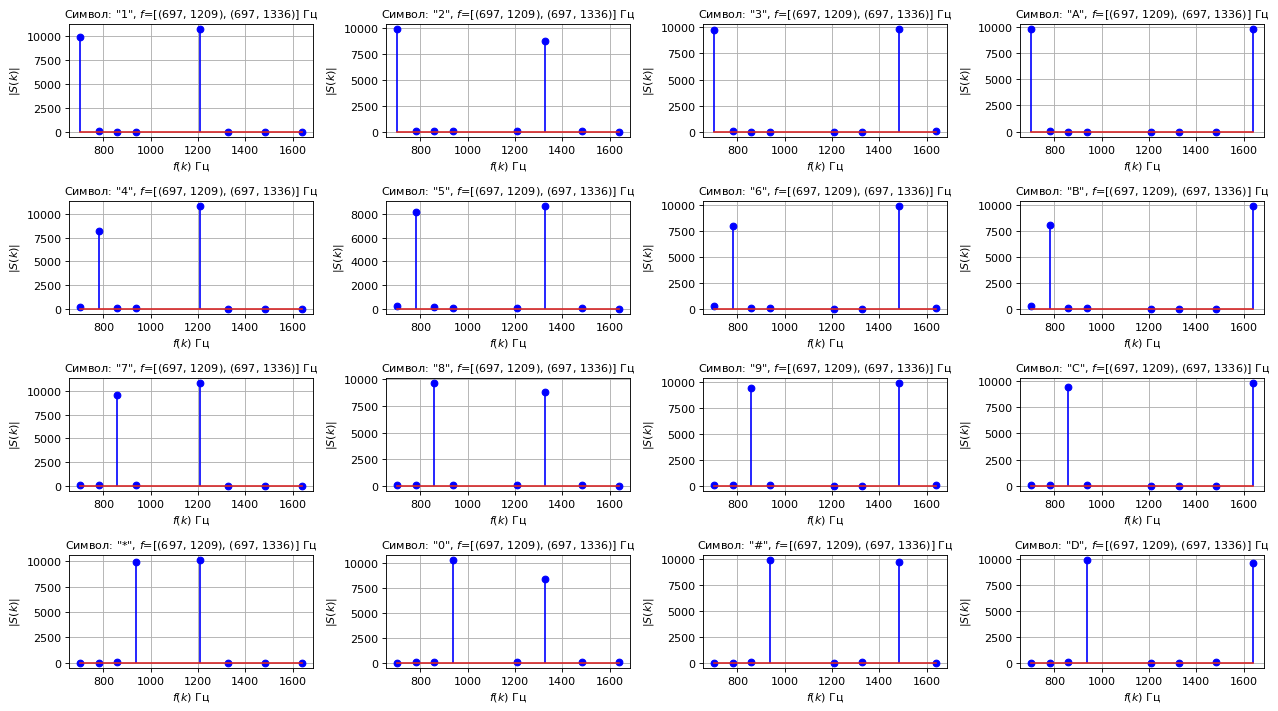

In [6]:
plt.figure(figsize=(16, 9), dpi=80)

for i in range(16):
    plt.subplot(4, 4, (i+1))
    plt.stem(freqs_list[i], np.array(results_list[i])[:,2], linefmt='b', markerfmt='bo', use_line_collection=True)
    plt.ylabel('$|S(k)|$')
    plt.xlabel('$f(k)$ Гц')
    plt.title(f'Символ: "{symbols[i]}", $f$=[{sample_rates[0]}, {sample_rates[1]}] Гц')
    plt.grid()
plt.tight_layout()